In [1]:
import pandas as pd
from google.colab import files

files.upload()
df = pd.read_csv('zoo.csv')

Saving zoo.csv to zoo.csv


In [2]:
import numpy as np
labels = df['class_type']
print(np.unique(labels.values))

[1 2 3 4 5 6 7]


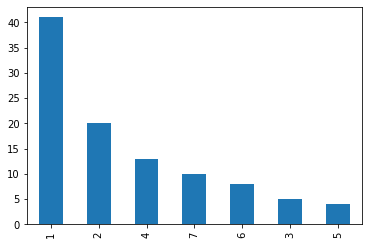

In [5]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots()
labels.value_counts().plot(kind = 'bar')

In [6]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
features = df.values[:,1:-1]
features.shape

(101, 16)

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
model = AgglomerativeClustering(n_clusters = 7, linkage = "average",affinity = "cosine")

In [11]:
model.fit(features)
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0])

In [12]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [14]:
labels = labels -1
from sklearn.metrics import mean_squared_error
score = mean_squared_error(labels,model.labels_)
abs_error = np.sqrt(score)
print(abs_error)

2.0416456185350014
